In [69]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 

{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [70]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [71]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [72]:
auto_mpg.variables

,name,role,type,demographic,description,units,missing_values
0,displacement,Feature,Continuous,None,None,None,no
1,mpg,Target,Continuous,None,None,None,no
2,cylinders,Feature,Integer,None,None,None,no
3,horsepower,Feature,Continuous,None,None,None,yes
4,weight,Feature,Continuous,None,None,None,no
5,acceleration,Feature,Continuous,None,None,None,no
6,model_year,Feature,Integer,None,None,None,no
7,origin,Feature,Integer,None,None,None,no
8,car_name,ID,Categorical,None,None,None,no


In [73]:
X.nunique()

displacement     82
cylinders         5
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
dtype: int64

In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [75]:
X.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [77]:
X.isna().sum()

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [78]:
df = X.copy()
df['mpg'] = y
print(df.shape)
#df

(398, 8)


In [79]:
df = df.dropna(axis=0, how='any')
print(df.shape)

(392, 8)


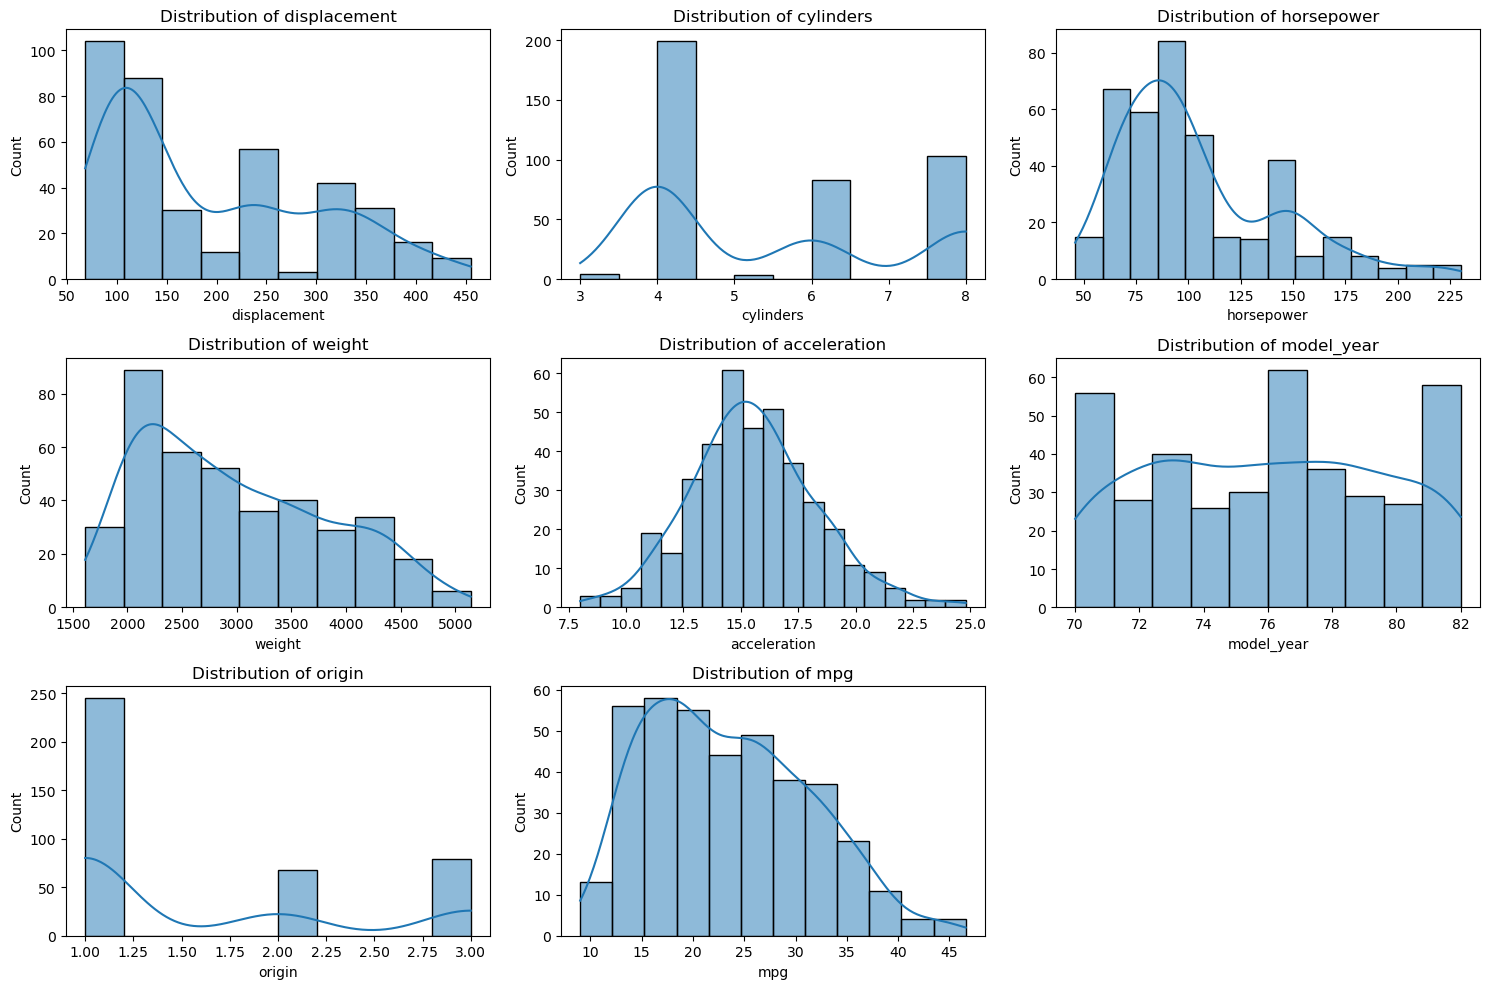

In [100]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

C:\Users\jbsch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


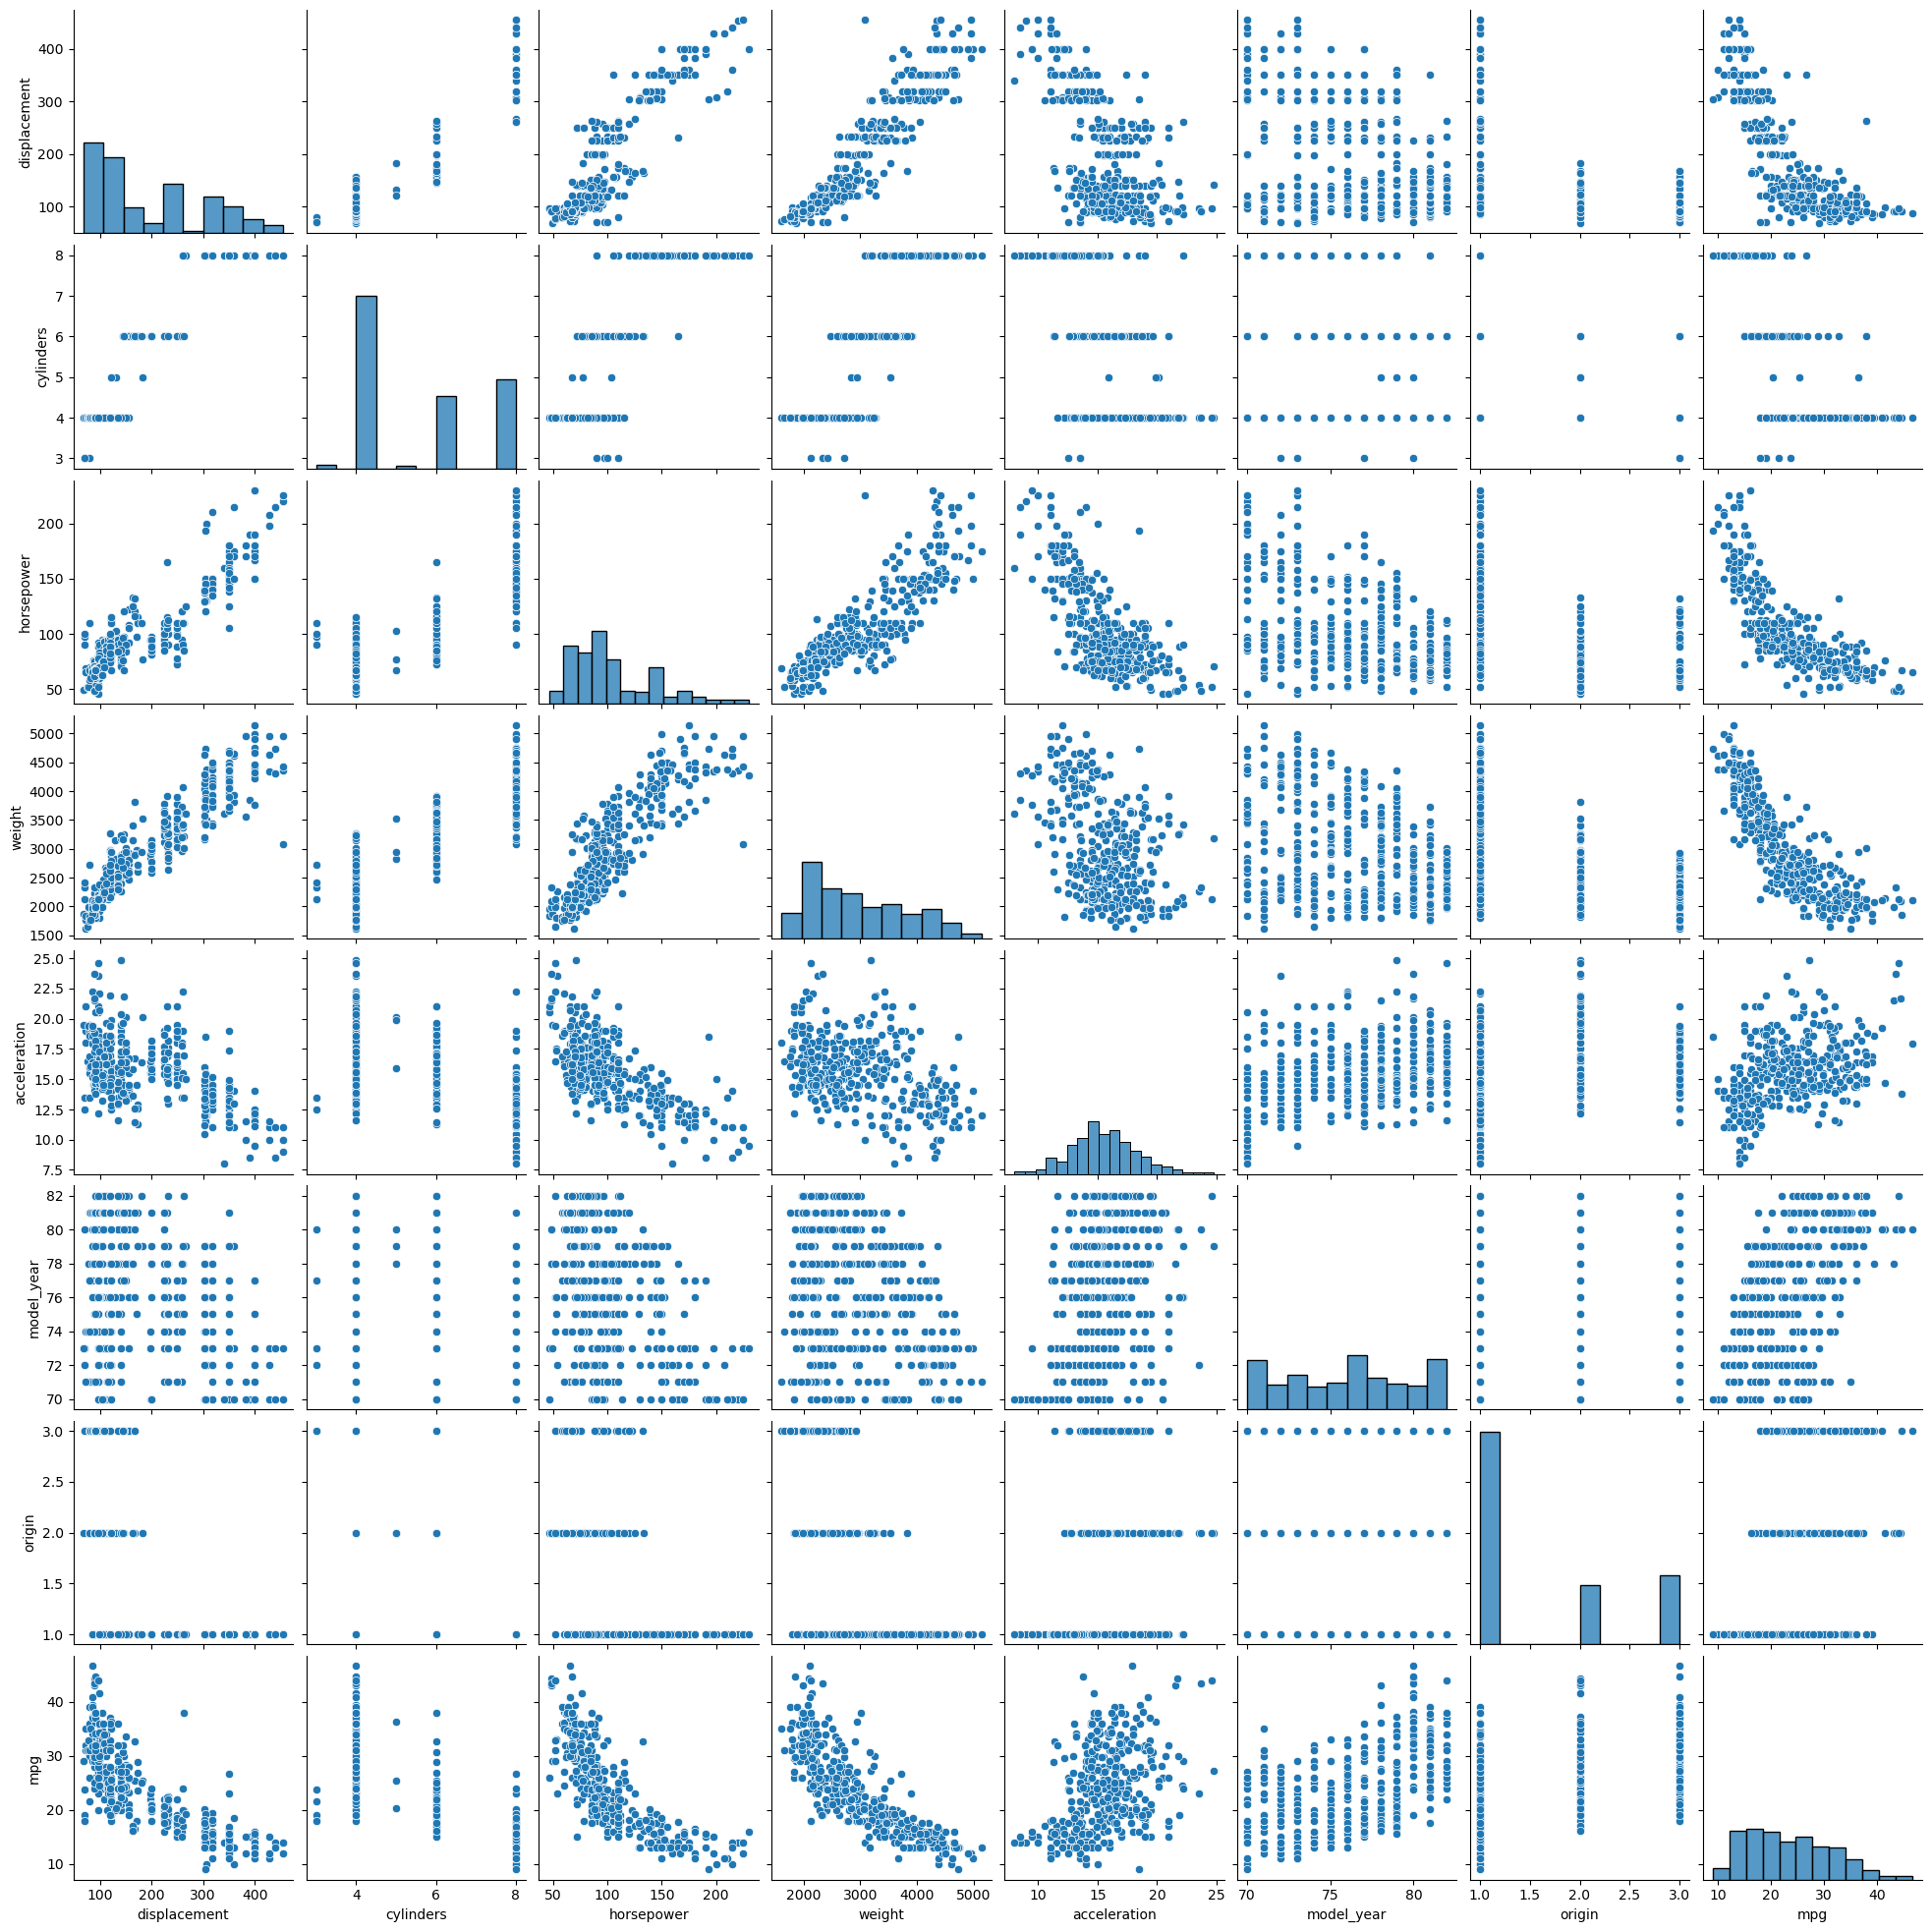

In [44]:
sns.pairplot(data=df)

<Axes: >

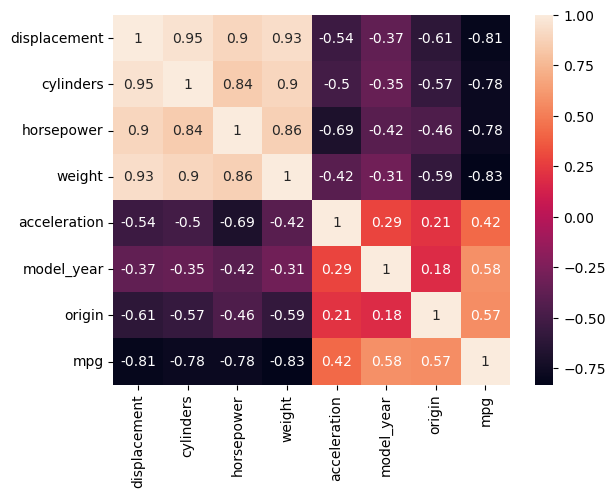

In [45]:
sns.heatmap(df.corr(), annot=True)

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features =  df.columns[df.columns != 'mpg']
for col in features:
    df[col] = scaler.fit_transform(pd.DataFrame(df[col]))

df.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,1.077290,1.483947,0.664133,0.620540,-1.285258,-1.625315,-0.716641,18.0
1,1.488732,1.483947,1.574594,0.843334,-1.466724,-1.625315,-0.716641,15.0
2,1.182542,1.483947,1.184397,0.540382,-1.648189,-1.625315,-0.716641,18.0
3,1.048584,1.483947,1.184397,0.536845,-1.285258,-1.625315,-0.716641,16.0
4,1.029447,1.483947,0.924265,0.555706,-1.829655,-1.625315,-0.716641,17.0


In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df.drop(['mpg'], axis=1)
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
w_list = []
b_list = []
def LinearRegression(X, y, learning_rate, num_iter):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    
    def calc_h(X, w, b):
        z = np.dot(X, w)+b
        return z
    
    for i in range(num_iter):
        y_pred = predict(X, w, b)
        w_list, b_list = update_weights(X, y, w, b, learning_rate)
    
    w_final = w_list[num_iter-1]
    b_final = b_list[num_iter-1]
    
    return w_final, b_final
    
def predict(X, w, b):
    y_pred = np.dot(X, w)+b   
    return y_pred

def update_weights(X, y, w, b, learning_rate):
    m, n = X.shape
    z = np.dot(X, w)+b
    # gradients       
    dw = -(2*np.dot(X.T, y-z))/m 
    db = -2*np.sum(y-z)/m  
    # update weights     
    w = w - learning_rate * dw     
    b = b - learning_rate * db
    w_list.append(w)
    b_list.append(b)
    return w_list, b_list

def model_evaluation(y_pred, y):
    mse = np.mean((y - y_pred) ** 2)
    print(f"MSE: {mse}")

In [111]:
w, b = LinearRegression(X_train, y_train, learning_rate=0.01, num_iter=10000)
print(w)
print(b)

[-0.12282094 -0.12067328 -0.12205436 -0.12666094  0.06731406  0.12167115
  0.07846528]
0.47198722044728436


In [113]:
y_pred_train = predict(X_train, w, b)
y_pred_test = predict(X_test, w, b)
print('Training data')
model_evaluation(y_pred_train, y_train)
print('\n')
print('Test data')
model_evaluation(y_pred_test, y_test)

Training data
MSE: 589.7470051484555


Test data
MSE: 544.2577409247455
